In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [12]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")

map = {'C':1, 'Q':2, 'S':3}

train_data["Embarked"] = train_data["Embarked"].apply(lambda item: map.get(item))
train_data["Embarked"] = train_data["Embarked"].fillna(0)

In [13]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,3.0


In [14]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,2.529742
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.800254
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,2.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,3.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [15]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
map = {'C':1, 'Q':2, 'S':3}

test_data["Embarked"] = test_data["Embarked"].apply(lambda item: map.get(item))
test_data["Embarked"] = test_data["Embarked"].fillna(0)

In [16]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,3


In [17]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,2.401914
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.854496
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,2.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,3.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,3.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,3.000000


In [18]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
print("% of women who survived:", sum(women)/len(women))
men = train_data.loc[train_data.Sex == 'male']["Survived"]
print("% of men who survived:", sum(men)/len(men))

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


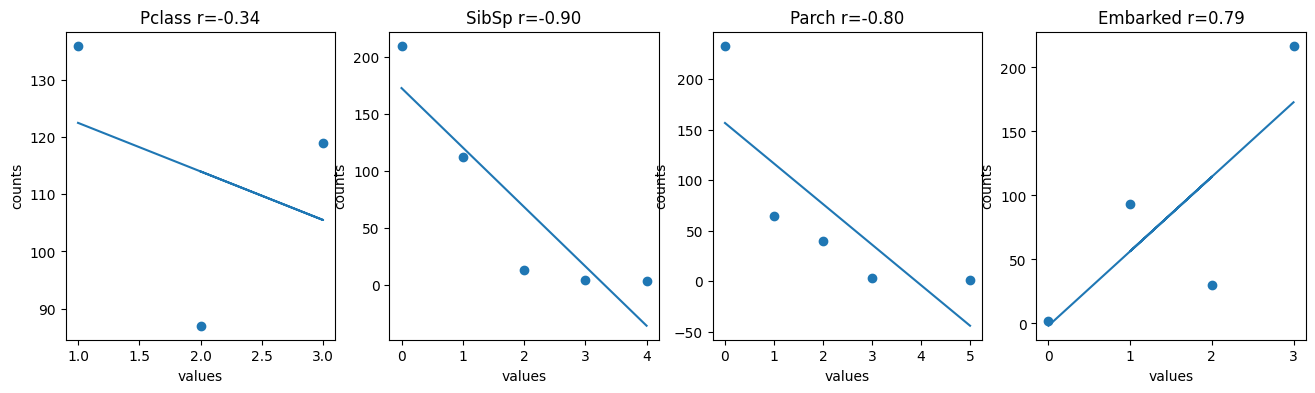

In [21]:
import matplotlib.pyplot as plt
value_count = train_data.loc[train_data.Survived == 1]["Pclass"].value_counts()
x = np.array(value_count.index.tolist())
y = np.array(value_count.tolist())
b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b0 = np.mean(y) - b1 * np.mean(x)
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
plt.scatter(x, y)
plt.plot(x, b0 + b1 * x)
plt.title(f"Pclass r={np.corrcoef(x, y)[1][0]:.2f}")
plt.xlabel('values')
plt.ylabel('counts')

value_count = train_data.loc[train_data.Survived == 1]["SibSp"].value_counts()
x = np.array(value_count.index.tolist())
y = np.array(value_count.tolist())
b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b0 = np.mean(y) - b1 * np.mean(x)
plt.subplot(1, 4, 2)
plt.scatter(x, y)
plt.plot(x, b0 + b1 * x)
plt.title(f"SibSp r={np.corrcoef(x, y)[1][0]:.2f}")
plt.xlabel('values')
plt.ylabel('counts')

value_count = train_data.loc[train_data.Survived == 1]["Parch"].value_counts()
x = np.array(value_count.index.tolist())
y = np.array(value_count.tolist())
b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b0 = np.mean(y) - b1 * np.mean(x)
plt.subplot(1, 4, 3)
plt.scatter(x, y)
plt.plot(x, b0 + b1 * x)
plt.title(f"Parch r={np.corrcoef(x, y)[1][0]:.2f}")
plt.xlabel('values')
plt.ylabel('counts')

value_count = train_data.loc[train_data.Survived == 1]["Embarked"].value_counts()
x = np.array(value_count.index.tolist())
y = np.array(value_count.tolist())
b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b0 = np.mean(y) - b1 * np.mean(x)
plt.subplot(1, 4, 4)
plt.scatter(x, y)
plt.plot(x, b0 + b1 * x)
plt.title(f"Embarked r={np.corrcoef(x, y)[1][0]:.2f}")
plt.xlabel('values')
plt.ylabel('counts')

plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
